In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 19

@author: yaning
"""

import pickle
# import torch
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pandas as pd

In [2]:
path = "/home/yaning/Documents/"
with open(path + "Spiking_add_files/validation_0_7_9.pkl", "rb") as f:
    maps = pickle.load(f)

In [3]:
len(maps)

91

In [4]:
maps[0].keys()

dict_keys(['sum_E', 'first_peak_index', 'map'])

In [5]:
maps[0]["first_peak_index"]

np.int64(127)

In [5]:
times = np.arange(4000)

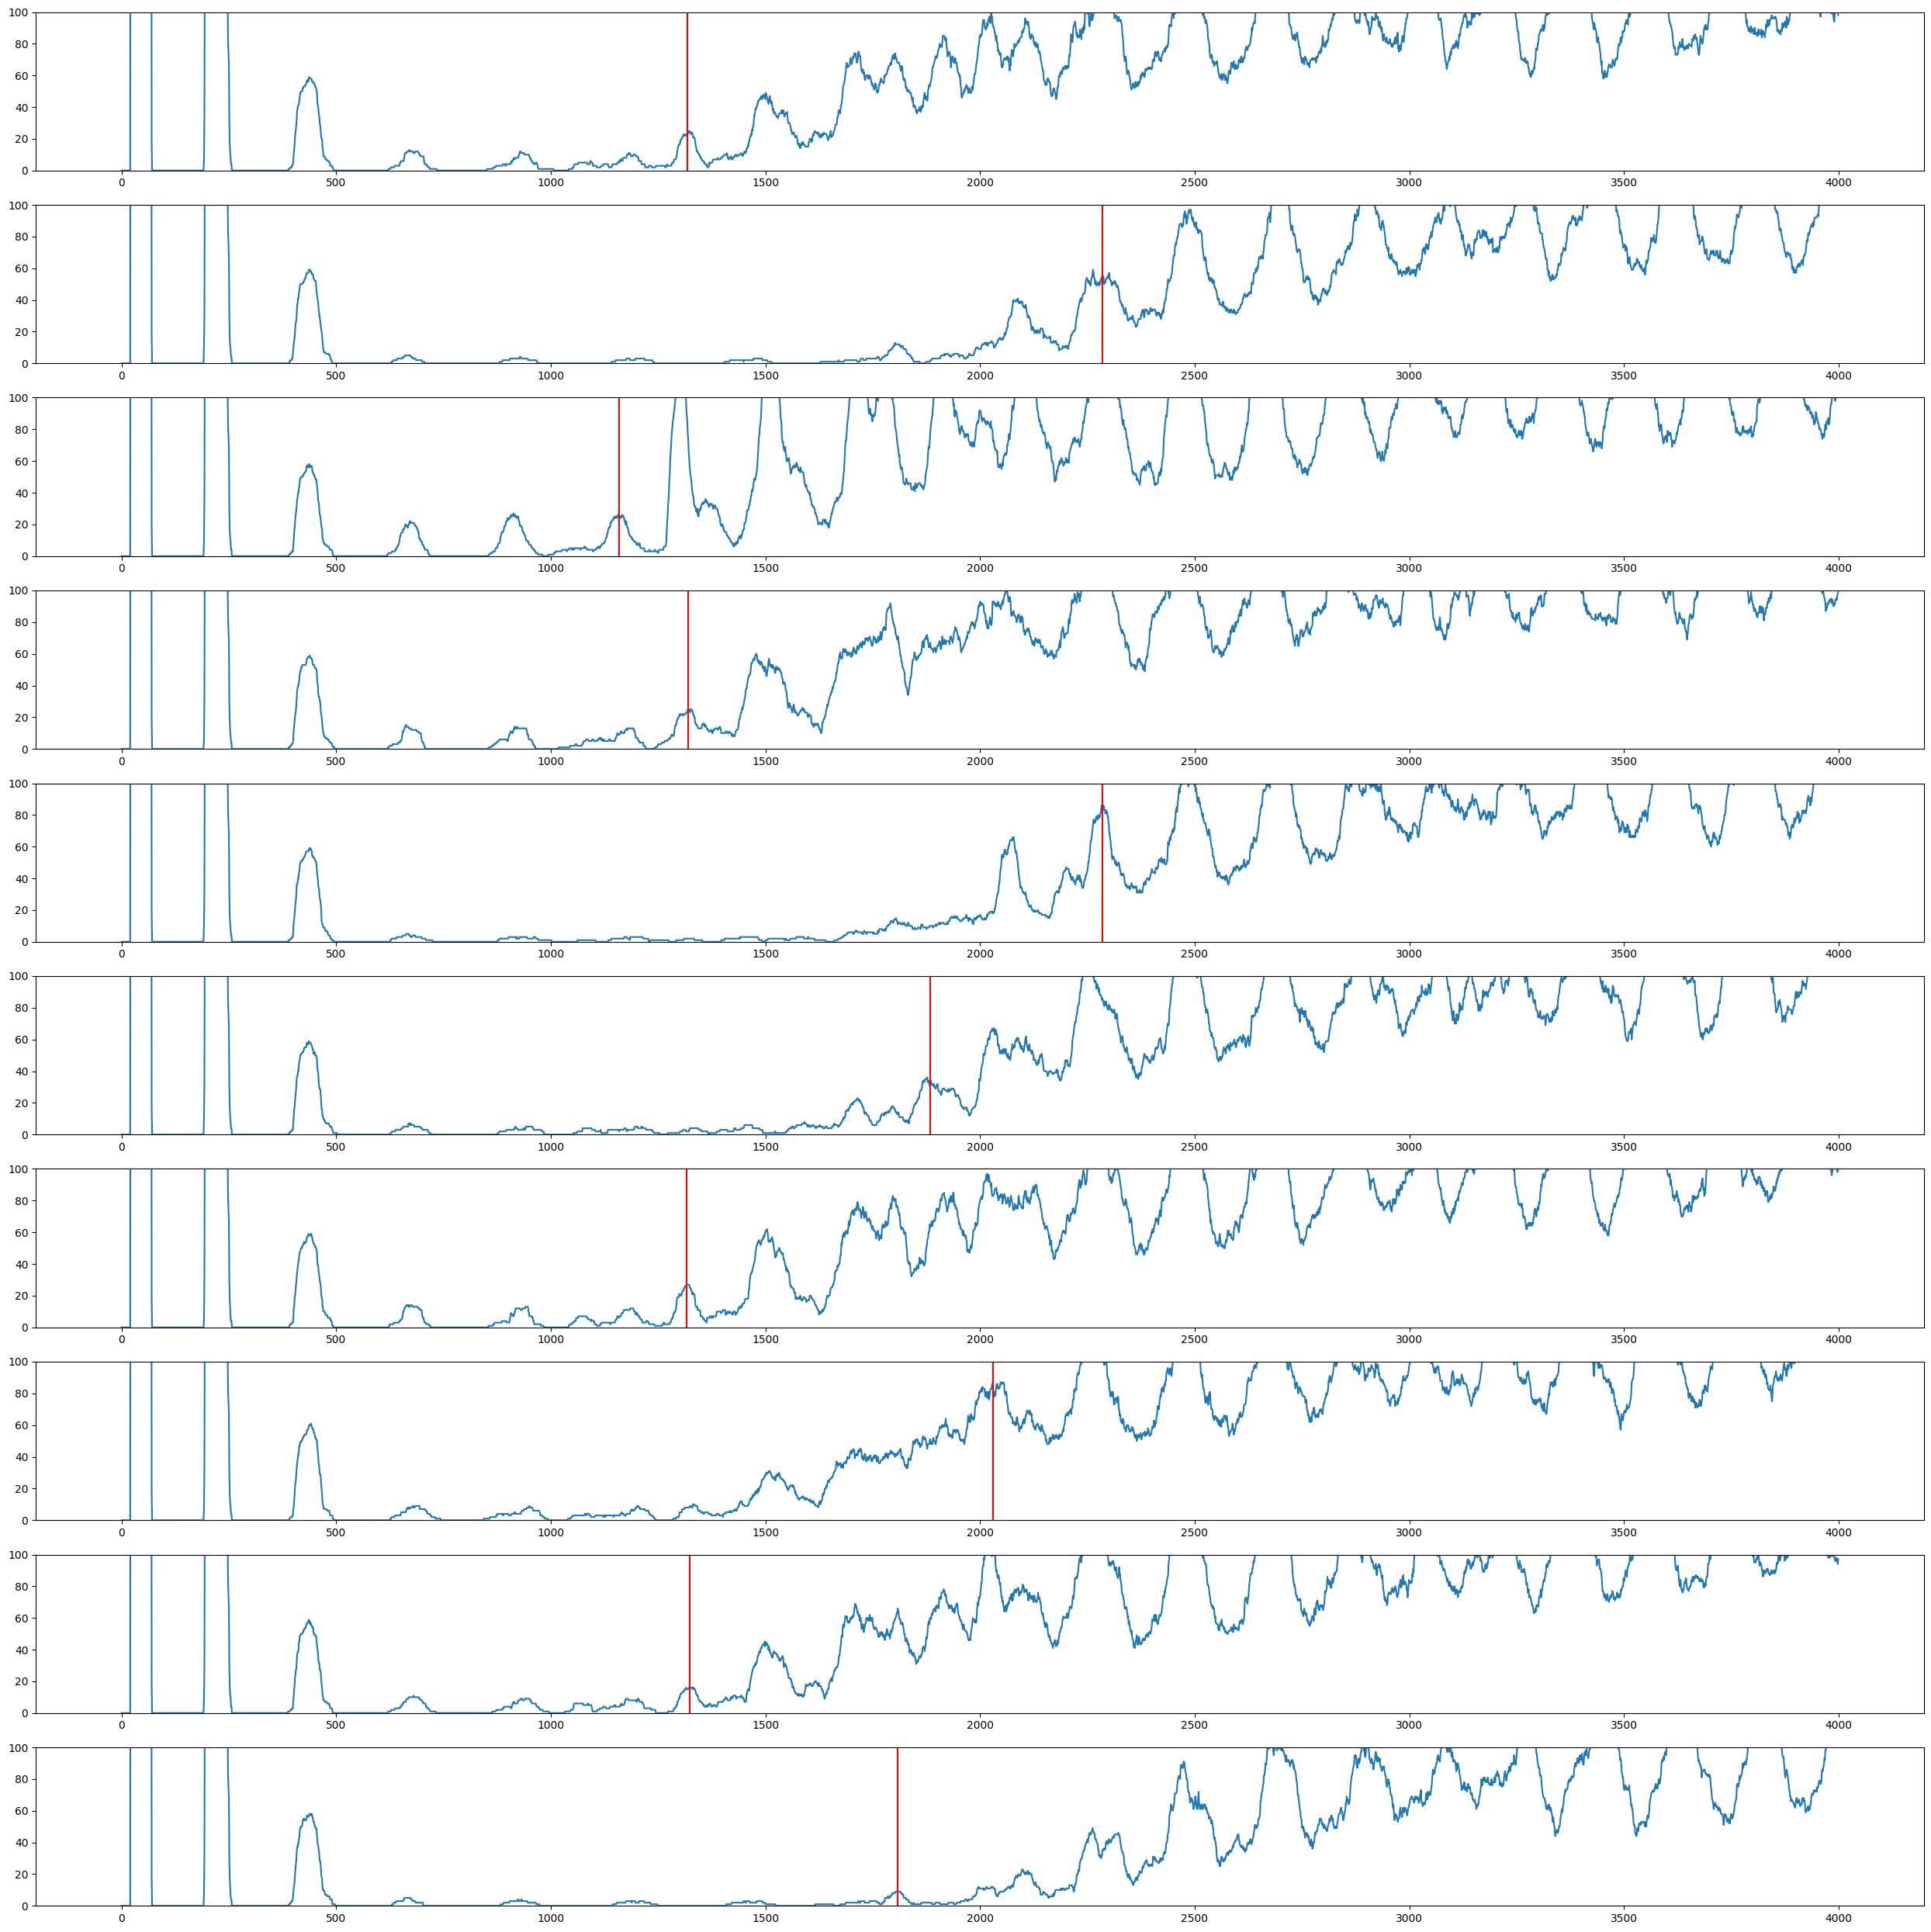

In [6]:
fig, axes = plt.subplots(10,1, figsize=(25,25))
axes = axes.flatten()

for i in range(10):
    axes[i].plot(times, maps[i]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[i]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

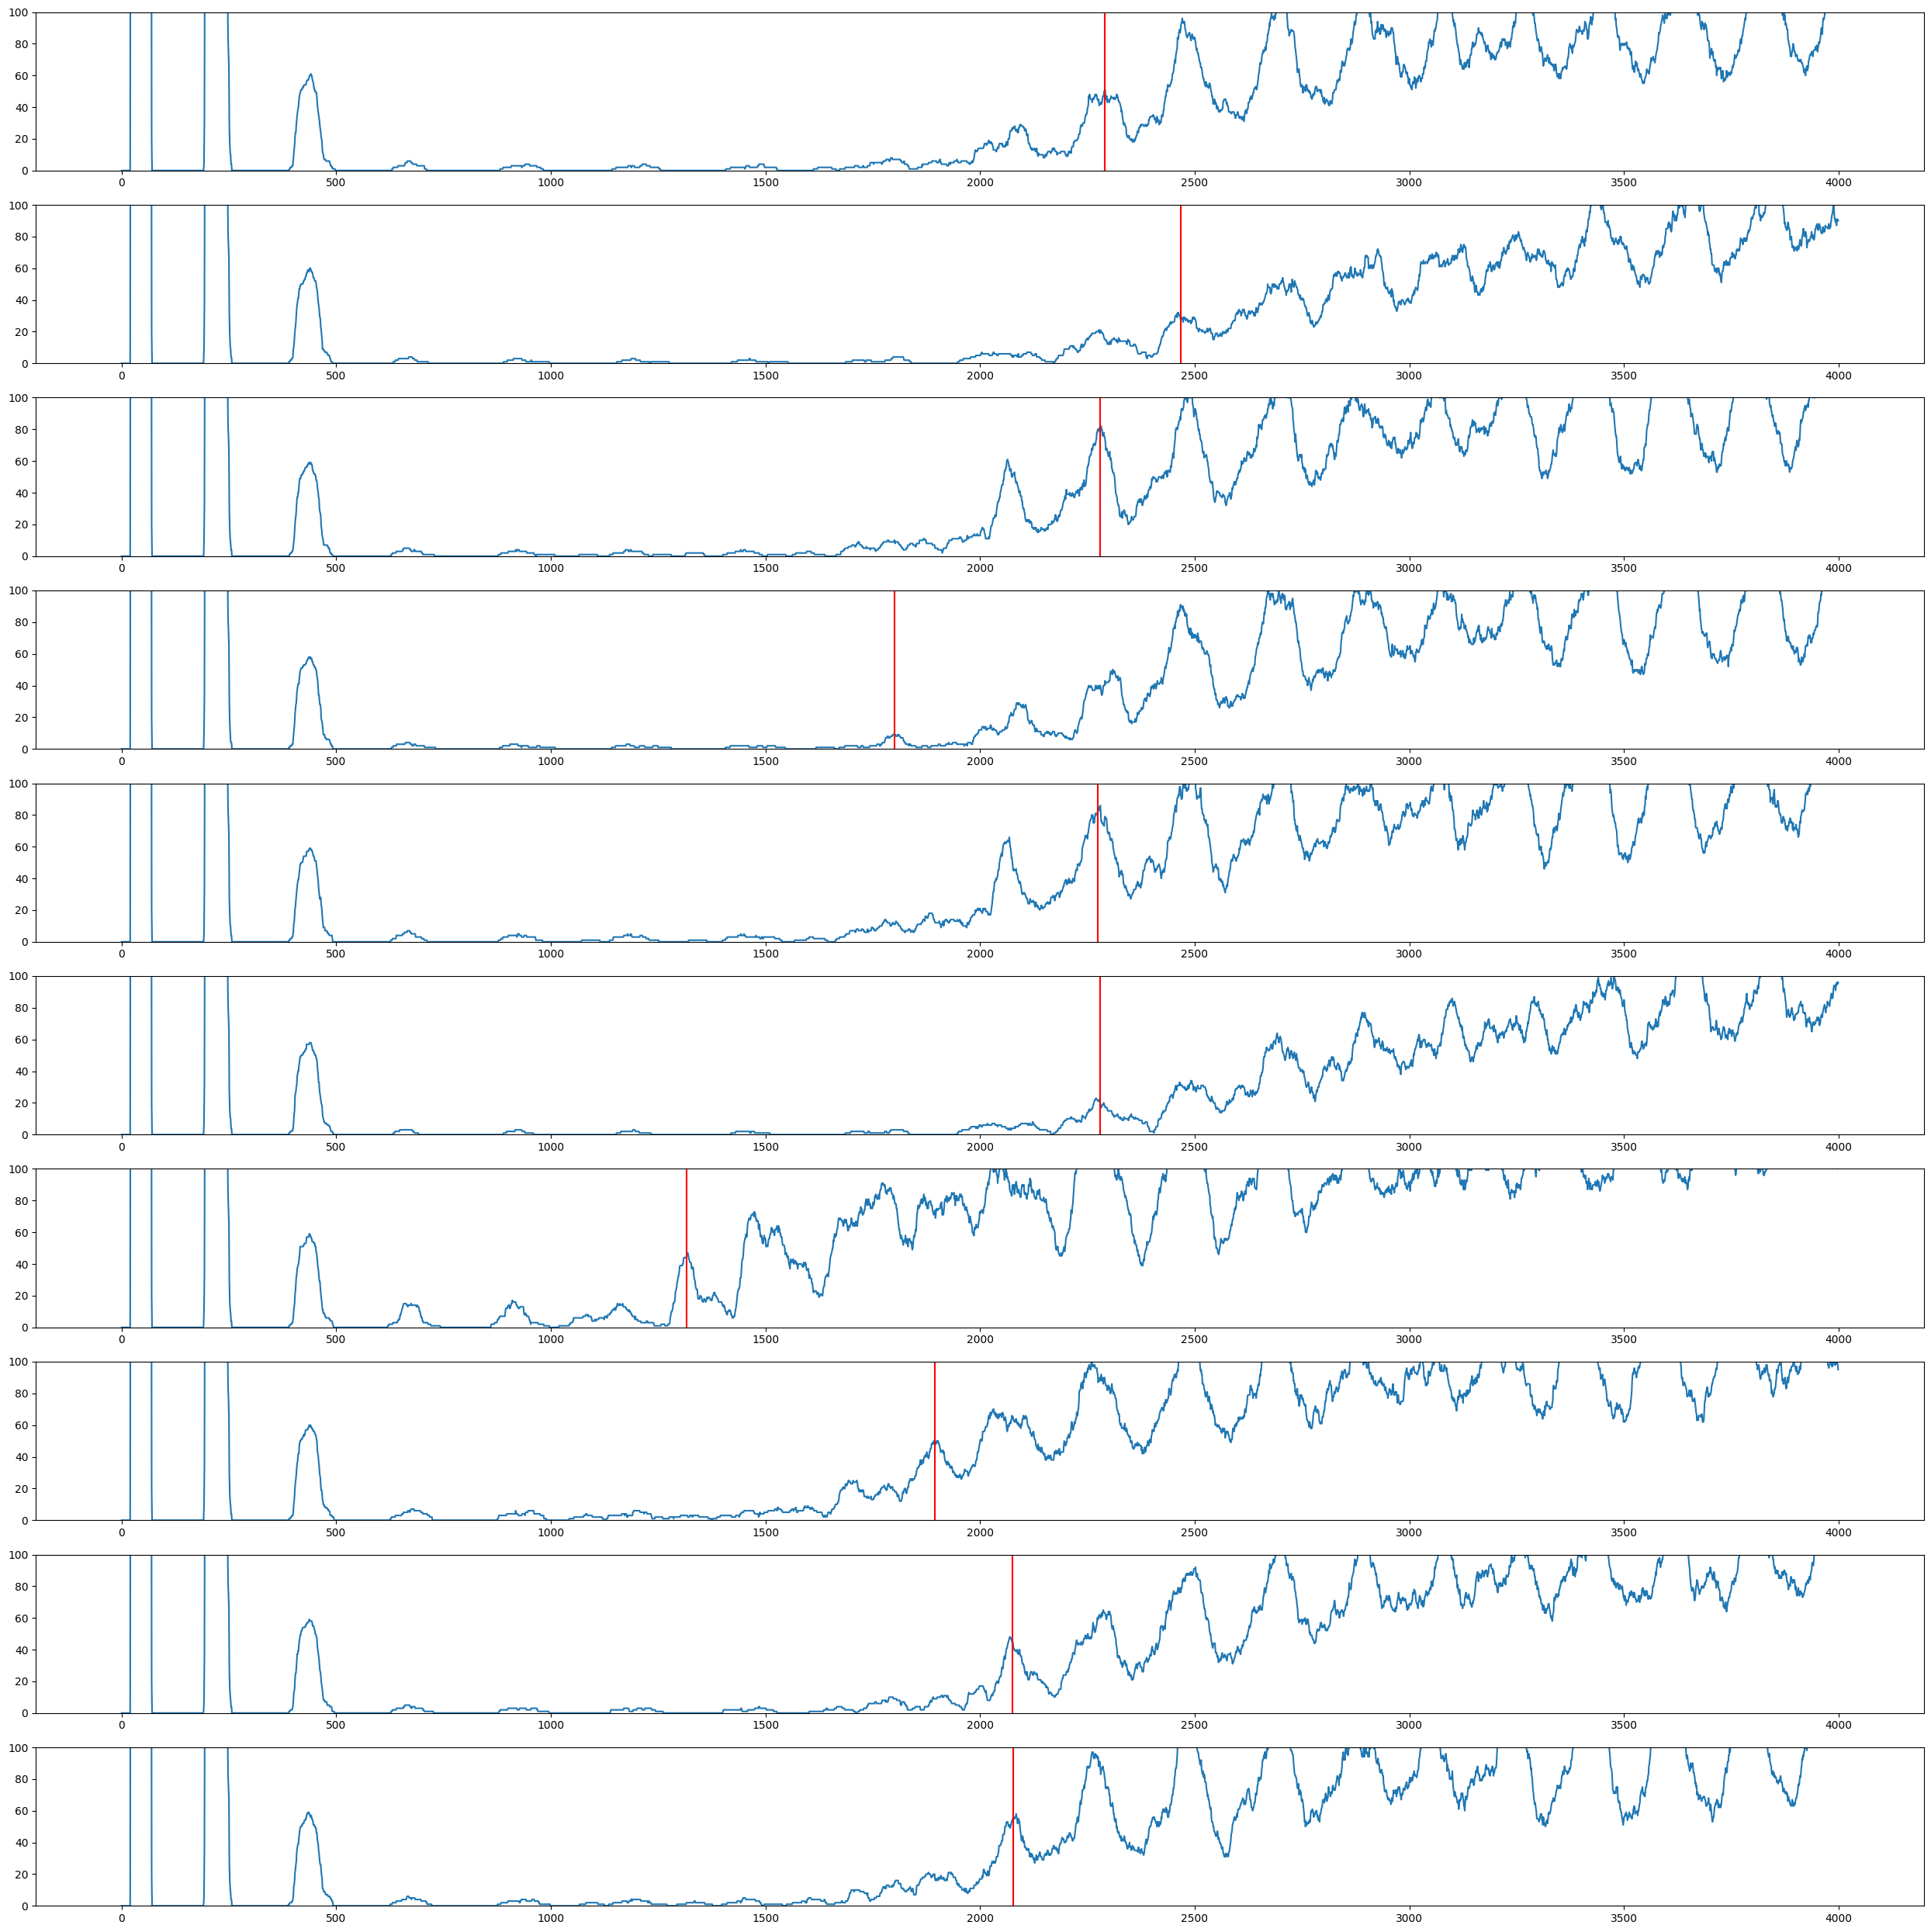

In [43]:
fig, axes = plt.subplots(10,1, figsize=(25,25))
axes = axes.flatten()

for i in range(nine_idx.shape[0]):
    axes[i].plot(times, maps[nine_idx[i]]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[nine_idx[i]]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

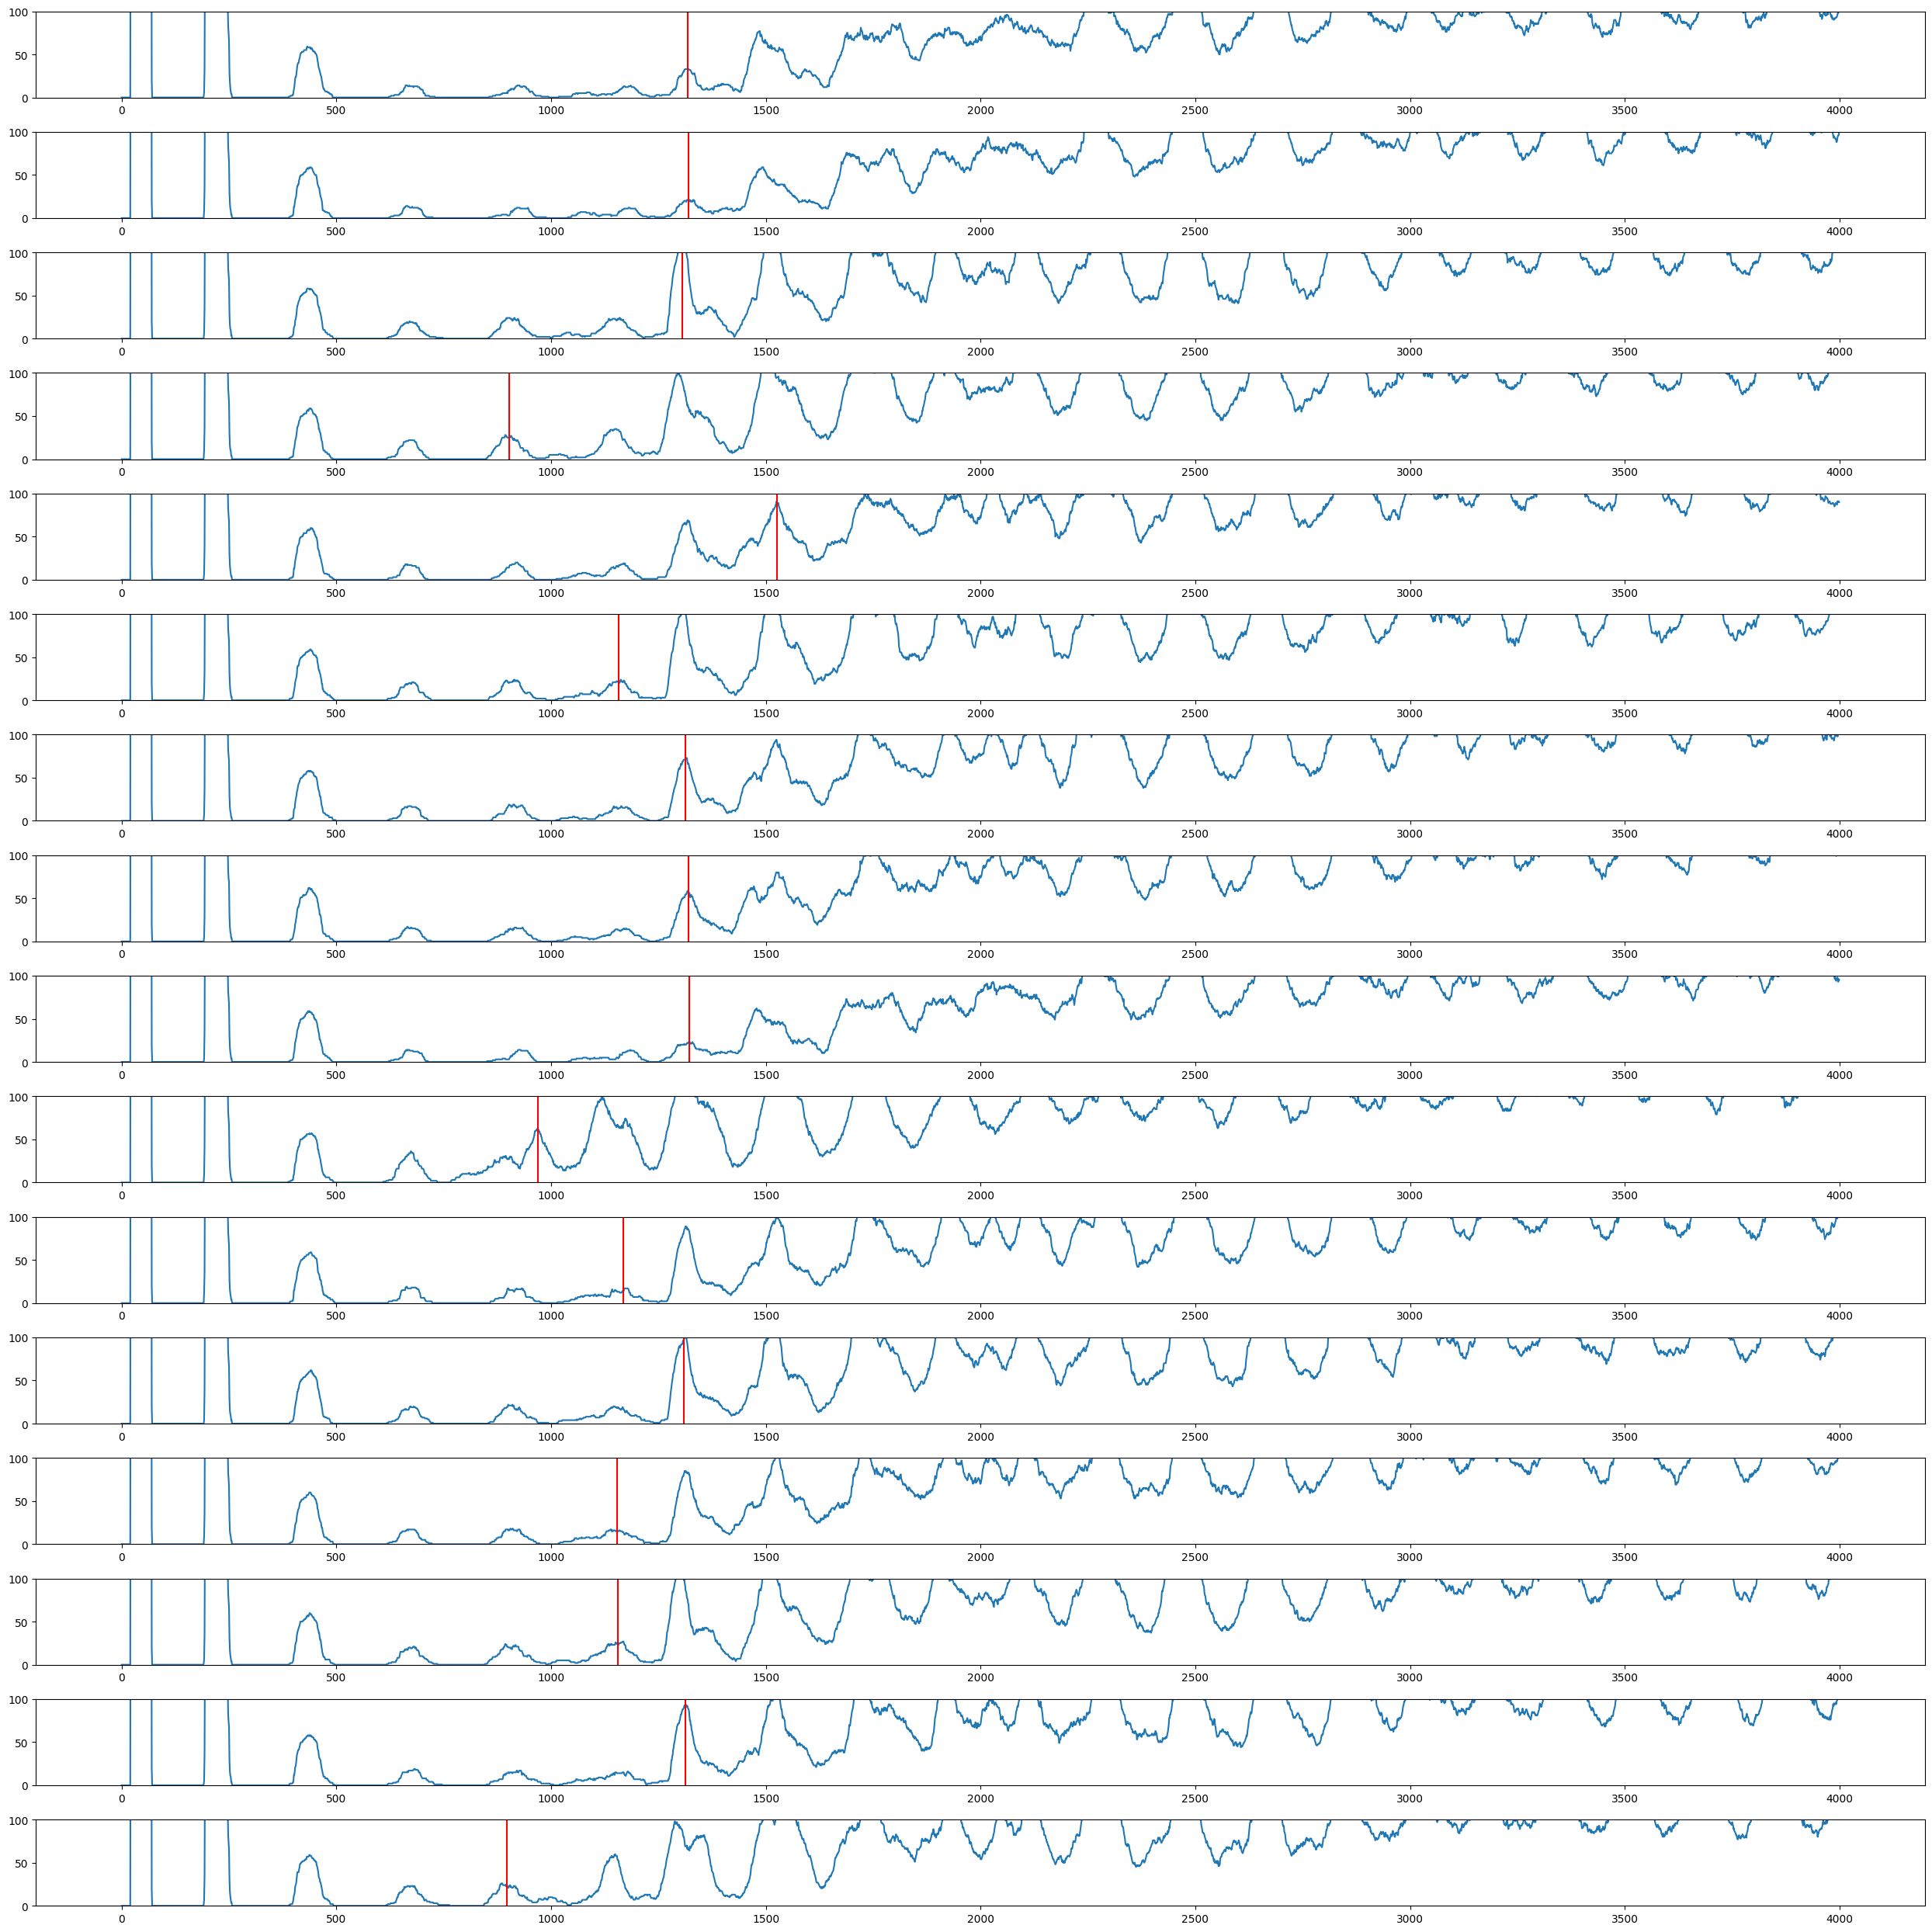

In [45]:
fig, axes = plt.subplots(16,1, figsize=(25,25))
axes = axes.flatten()

for i in range(zero_idx.shape[0]):
    axes[i].plot(times, maps[zero_idx[i]]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[zero_idx[i]]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

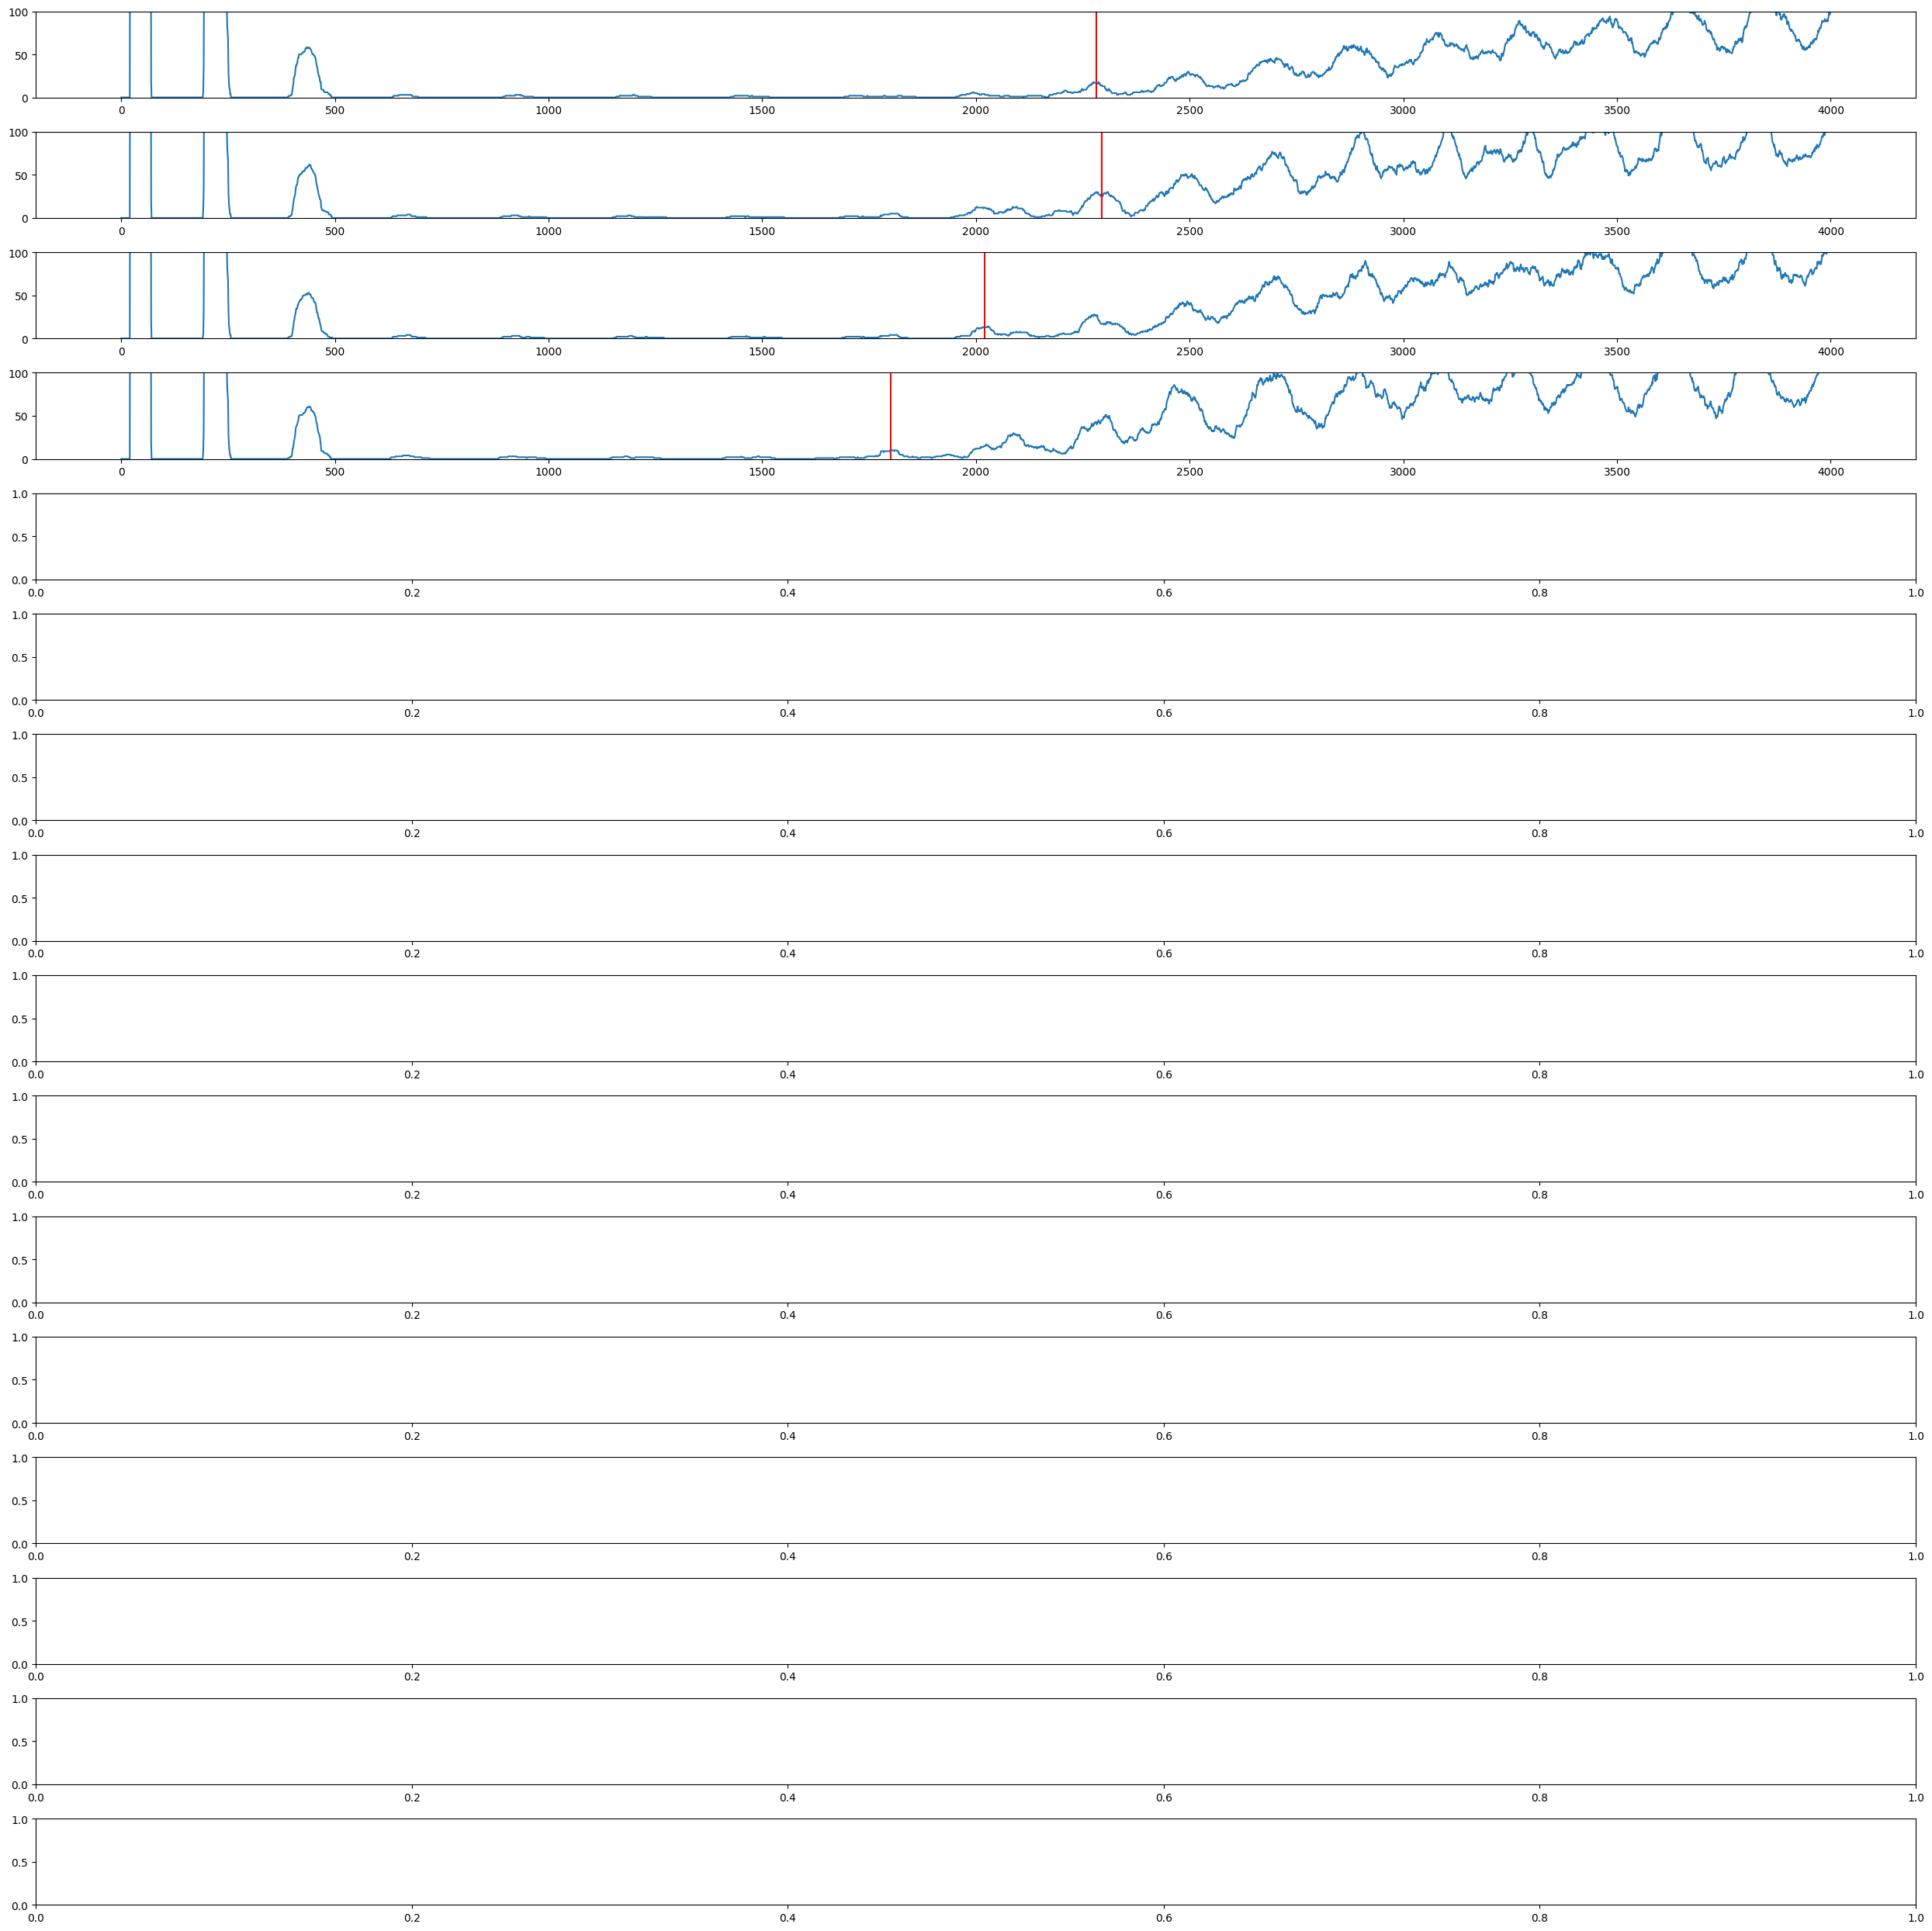

In [47]:
fig, axes = plt.subplots(16,1, figsize=(25,25))
axes = axes.flatten()

for i in range(five_idx.shape[0]):
    axes[i].plot(times, maps[five_idx[i]]["sum_E"])
    # axes[i].plot(times, maps[i]["length_sizes"])
    axes[i].axvline(x=maps[five_idx[i]]["first_peak_index"], color="red")
    # axes[i].plot(times[:3000], maps[i]["ratio"])
    axes[i].set_ylim(0,100)

plt.tight_layout()
plt.show()

In [7]:
num = 0
missing_idx = []
with open("0_7_9_output.log", "r") as f:
    for line in f:
        clean_line = line.strip()
        if clean_line == "Progress: 0/4000 (0.0%)":
            num += 1
        elif clean_line == "oops":
            missing_idx.append(num)

In [8]:
num

100

In [11]:
missing_idx

[0, 18, 30, 41, 48, 54, 62, 91, 95]

In [10]:
for i in range(len(missing_idx)):
    missing_idx[i] = missing_idx[i] - 1

In [12]:
len(maps)

91

In [13]:
with open(path + "Spiking_NN/datasets/mnst_30_hunni.pkl", "rb") as f:
    tags = pickle.load(f)

In [14]:
tags = tags['tag']

In [15]:
tags.shape

(100,)

In [16]:
tags = np.delete(tags, missing_idx)

In [ ]:
# binary_maps = []
# for i in maps:
#     temp = (i["map"] != 0).astype(int)
#     binary_maps.append(temp)

In [ ]:
# from matplotlib.colors import ListedColormap
# cmap = ListedColormap([plt.cm.YlGnBu(0.0), plt.cm.YlGnBu(0.8)])

In [17]:
# only get the nines and zeros
nine_idx = np.where(tags == 9)[0]
zero_idx = np.where(tags == 0)[0]
seven_idx = np.where(tags == 7)[0]

In [18]:
zero_idx.shape

(15,)

In [19]:
nine_maps = []
for i in nine_idx:
    nine_maps.append(maps[i]["map"])

In [20]:
zero_maps = []
for i in zero_idx:
    zero_maps.append(maps[i]["map"])

In [21]:
seven_maps = []
for i in seven_idx:
    seven_maps.append(maps[i]["map"])

In [25]:
len(zero_maps)

16

In [14]:
len(maps)

10

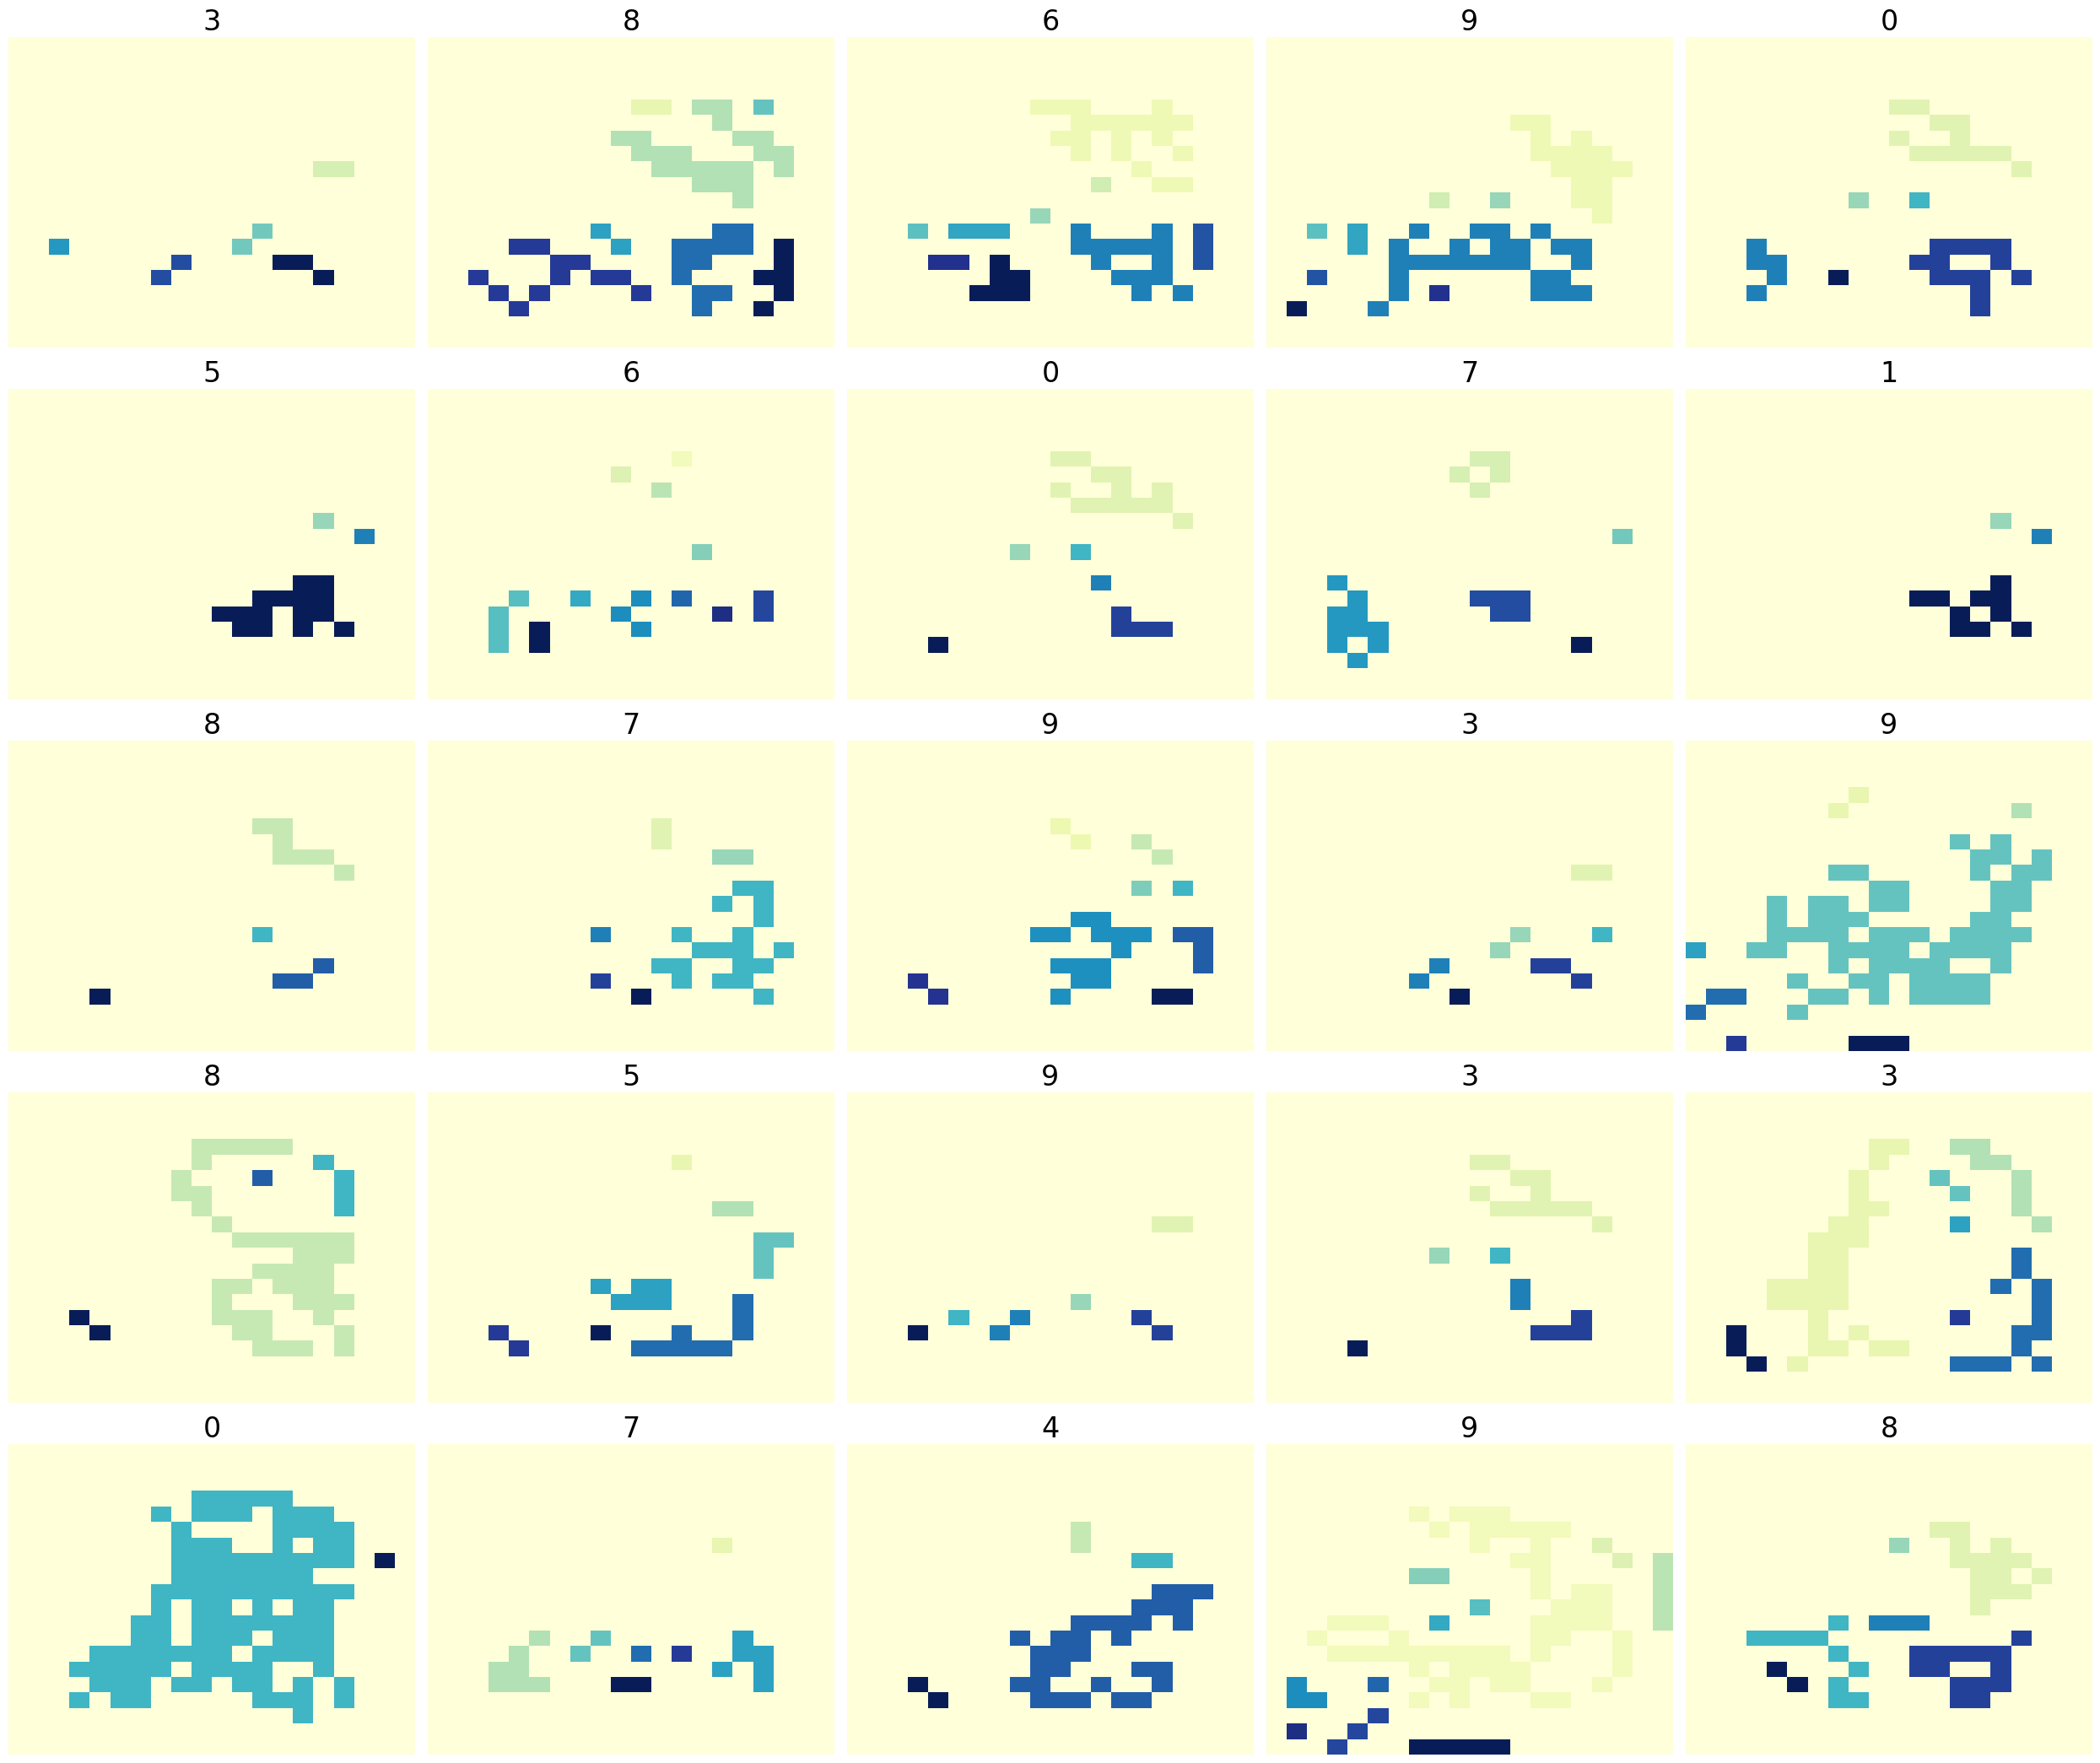

In [42]:
fig, axes = plt.subplots(5,5, figsize=(25,21))
axes = axes.flatten()

for i in range(25):

    sns.heatmap(maps[i]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

In [22]:
len(nine_idx)

9

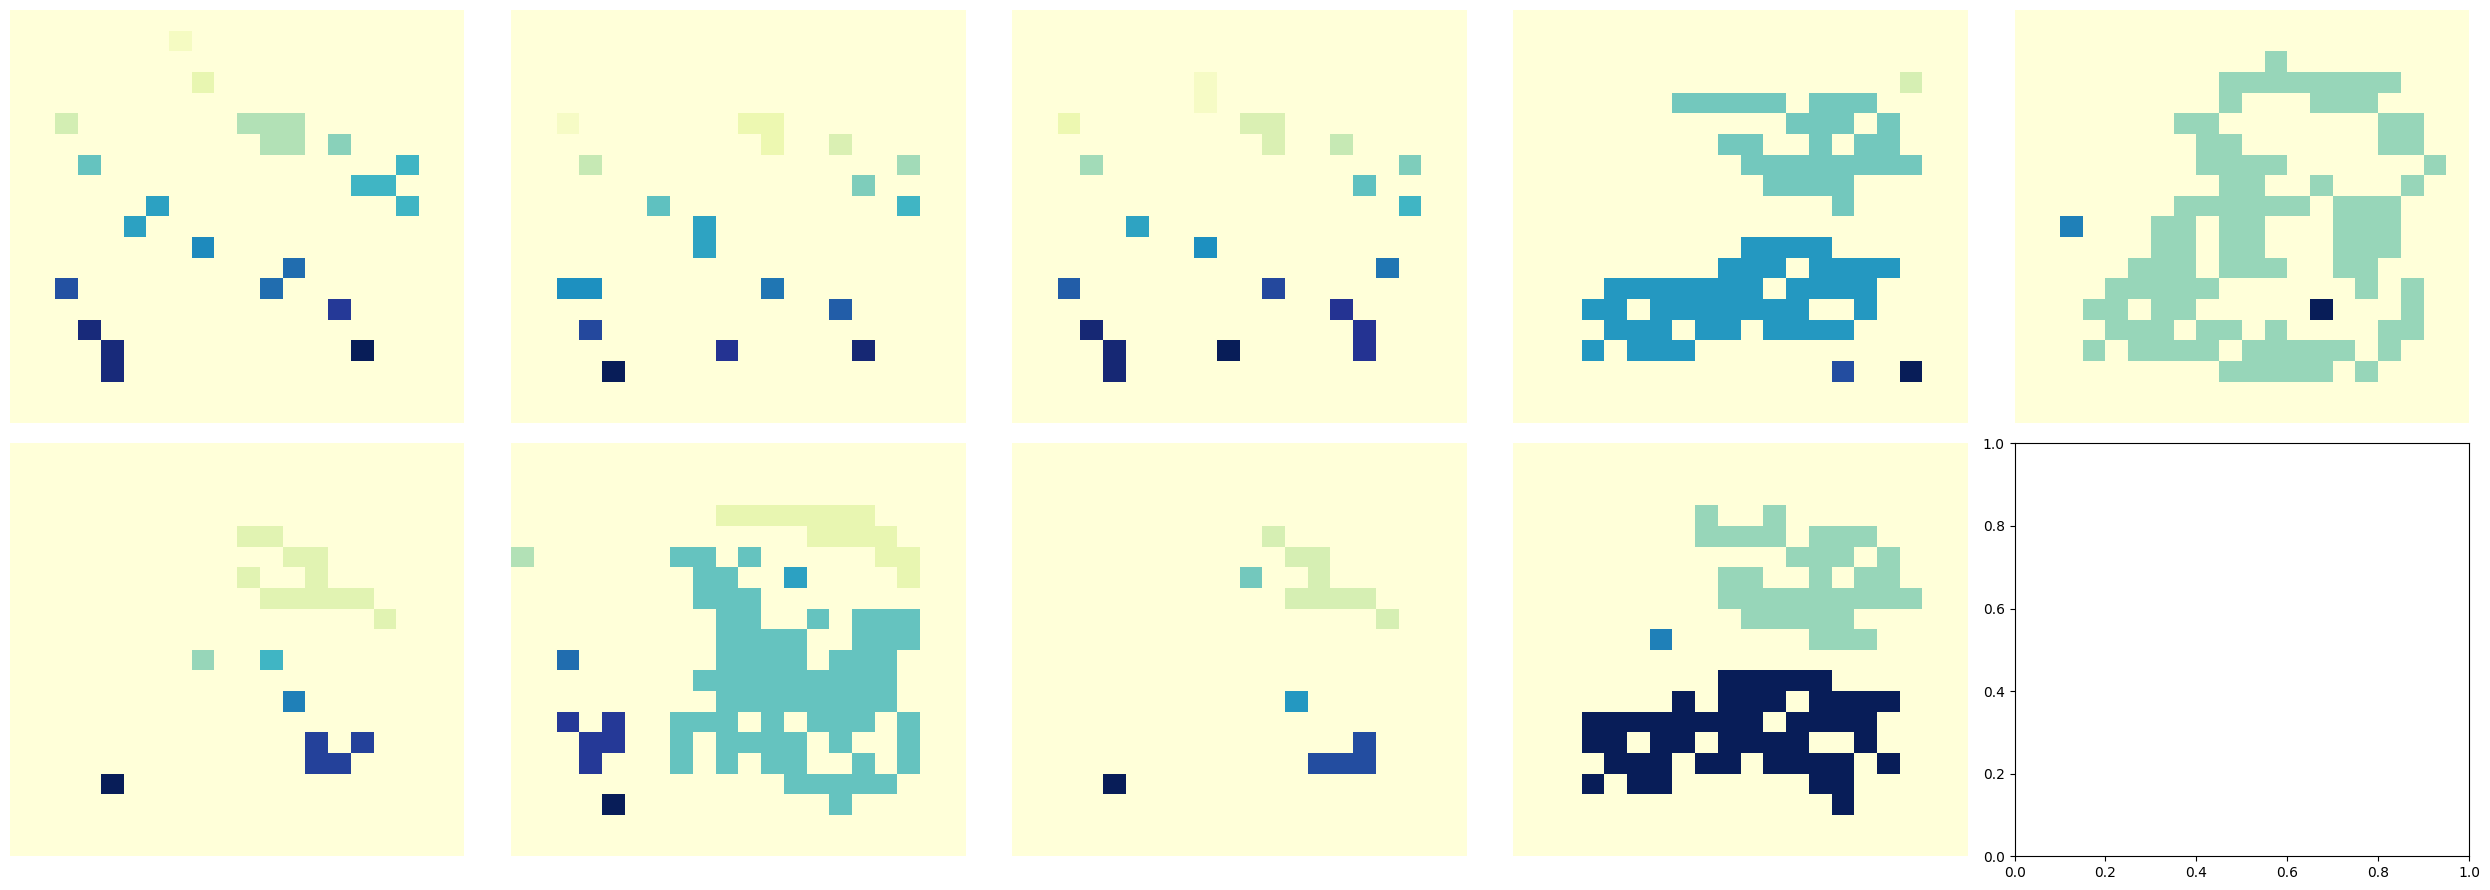

In [23]:
fig, axes = plt.subplots(2,5, figsize=(25,9))
axes = axes.flatten()

for i in range(nine_idx.shape[0]):

    sns.heatmap(maps[nine_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

In [62]:
for i in nine_maps:
    # temp = i[15:18,5:15]
    temp = i
    temp = (temp != 0).astype(int)
    temp_sum = temp.sum()
    print(temp_sum)

51
28
80
9
83
22
46
49
45
55


In [63]:
for i in zero_maps:
    # temp = i[15:18,5:15]
    temp = i
    temp = (temp != 0).astype(int)
    temp_sum = temp.sum()
    print(temp_sum)

33
21
111
25
88
20
71
57
23
60
14
97
15
24
92
22


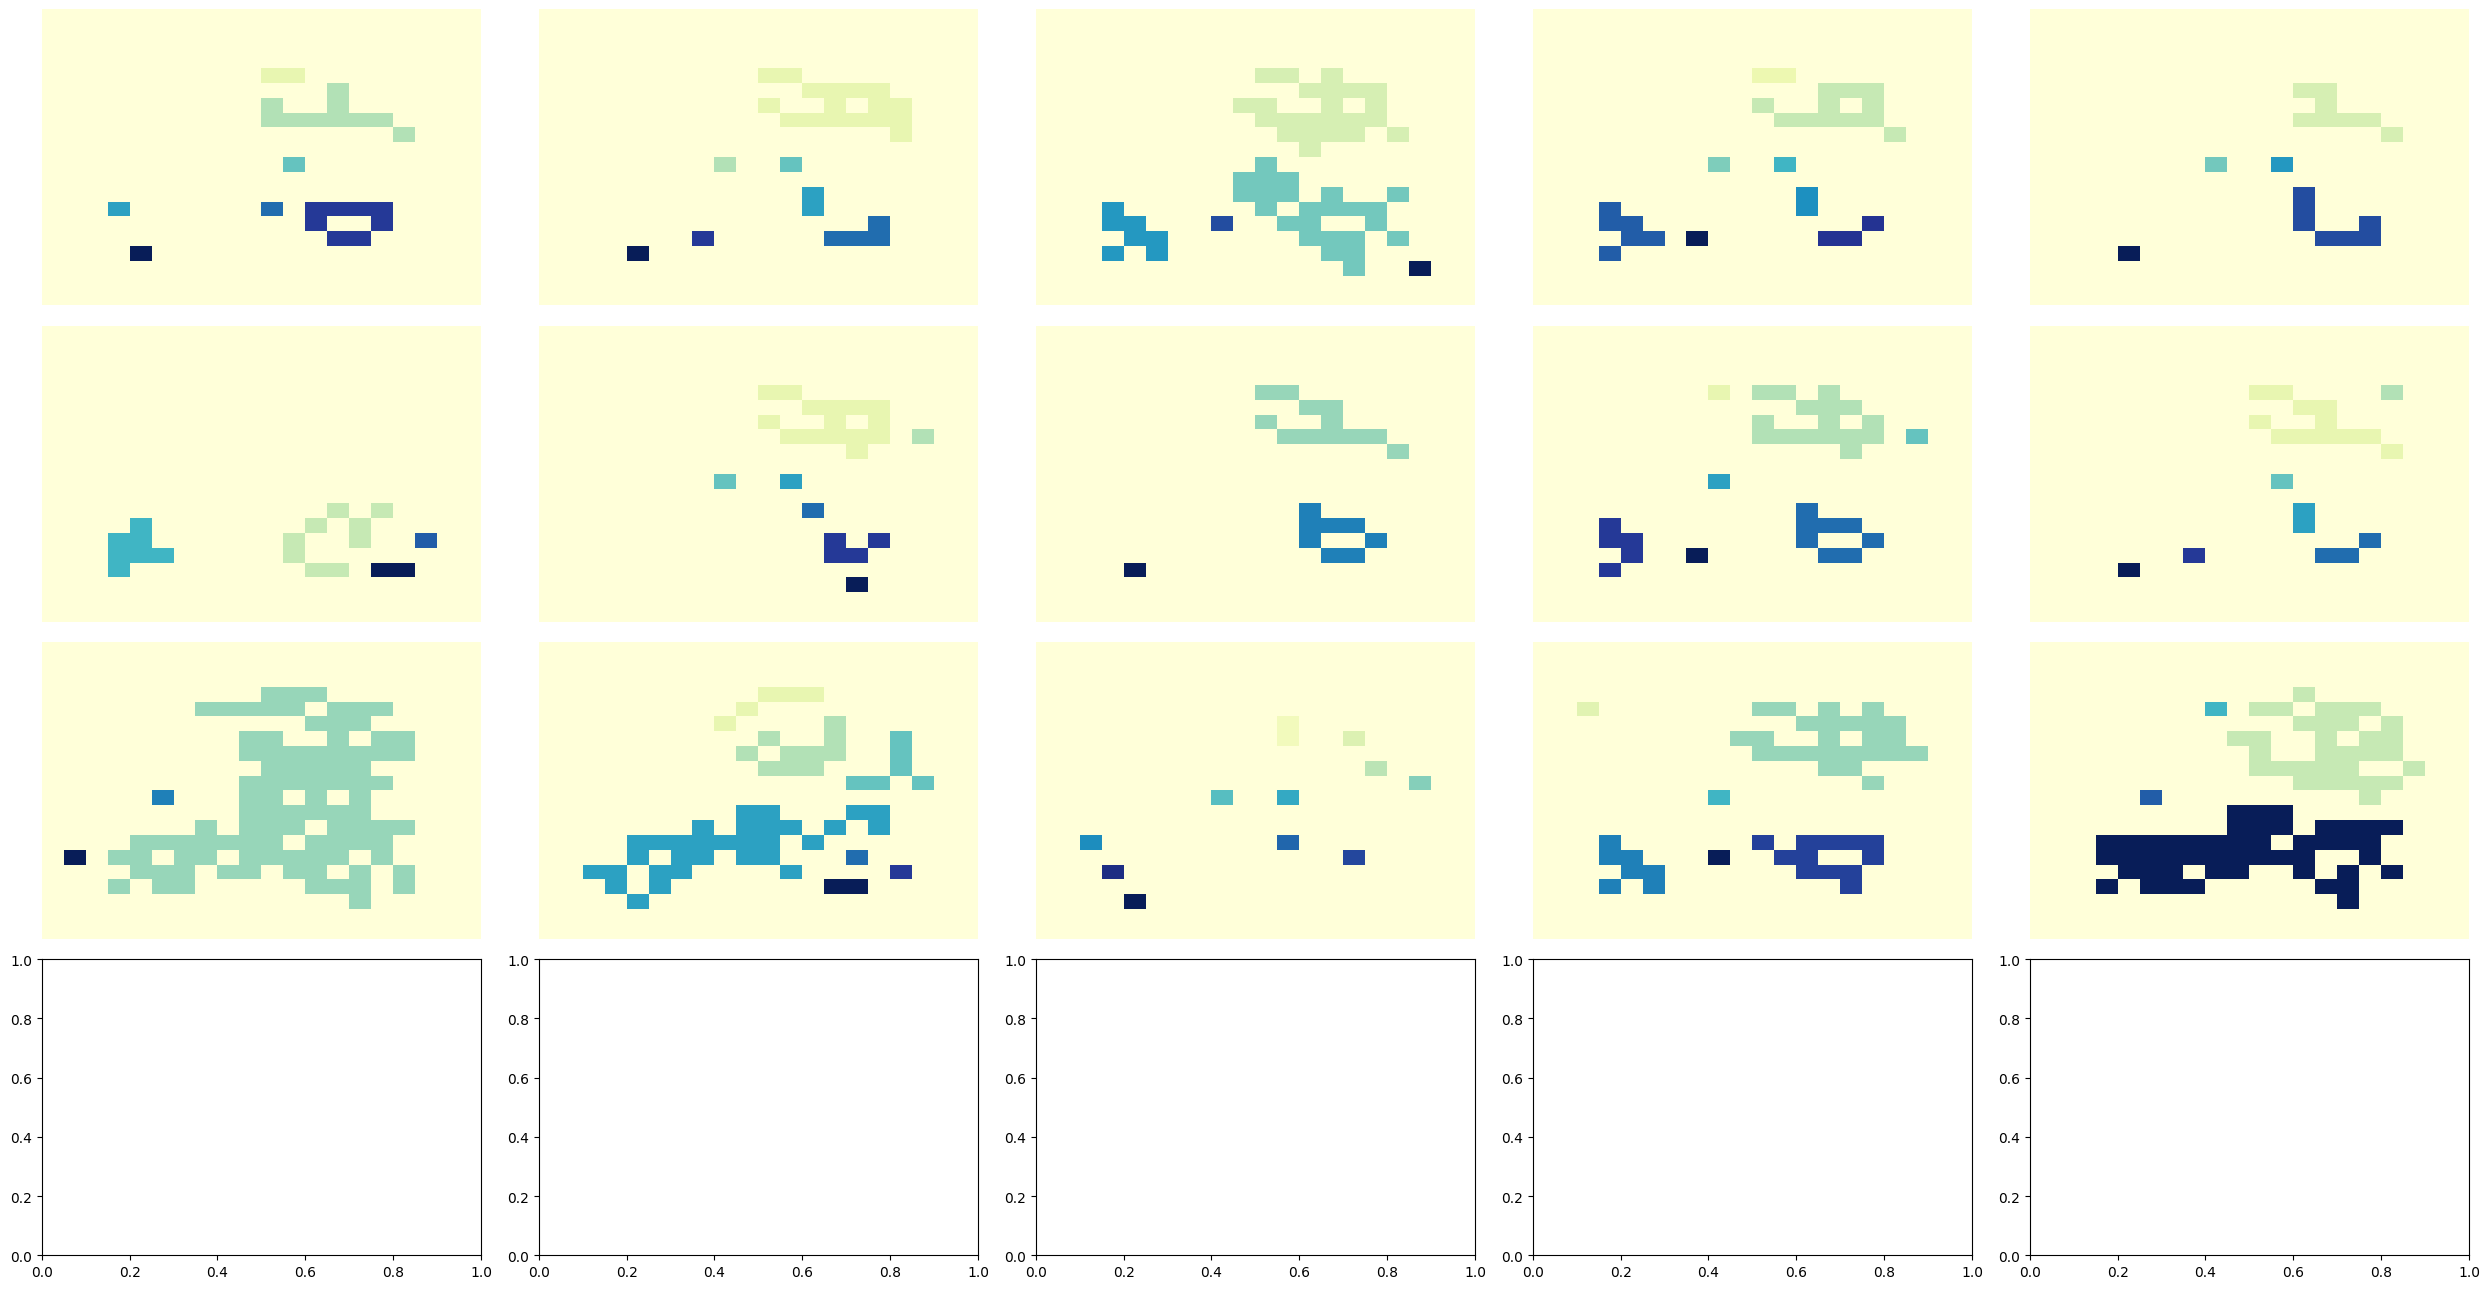

In [24]:
fig, axes = plt.subplots(4,5, figsize=(25,13))
axes = axes.flatten()

for i in range(zero_idx.shape[0]):

    sns.heatmap(maps[zero_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

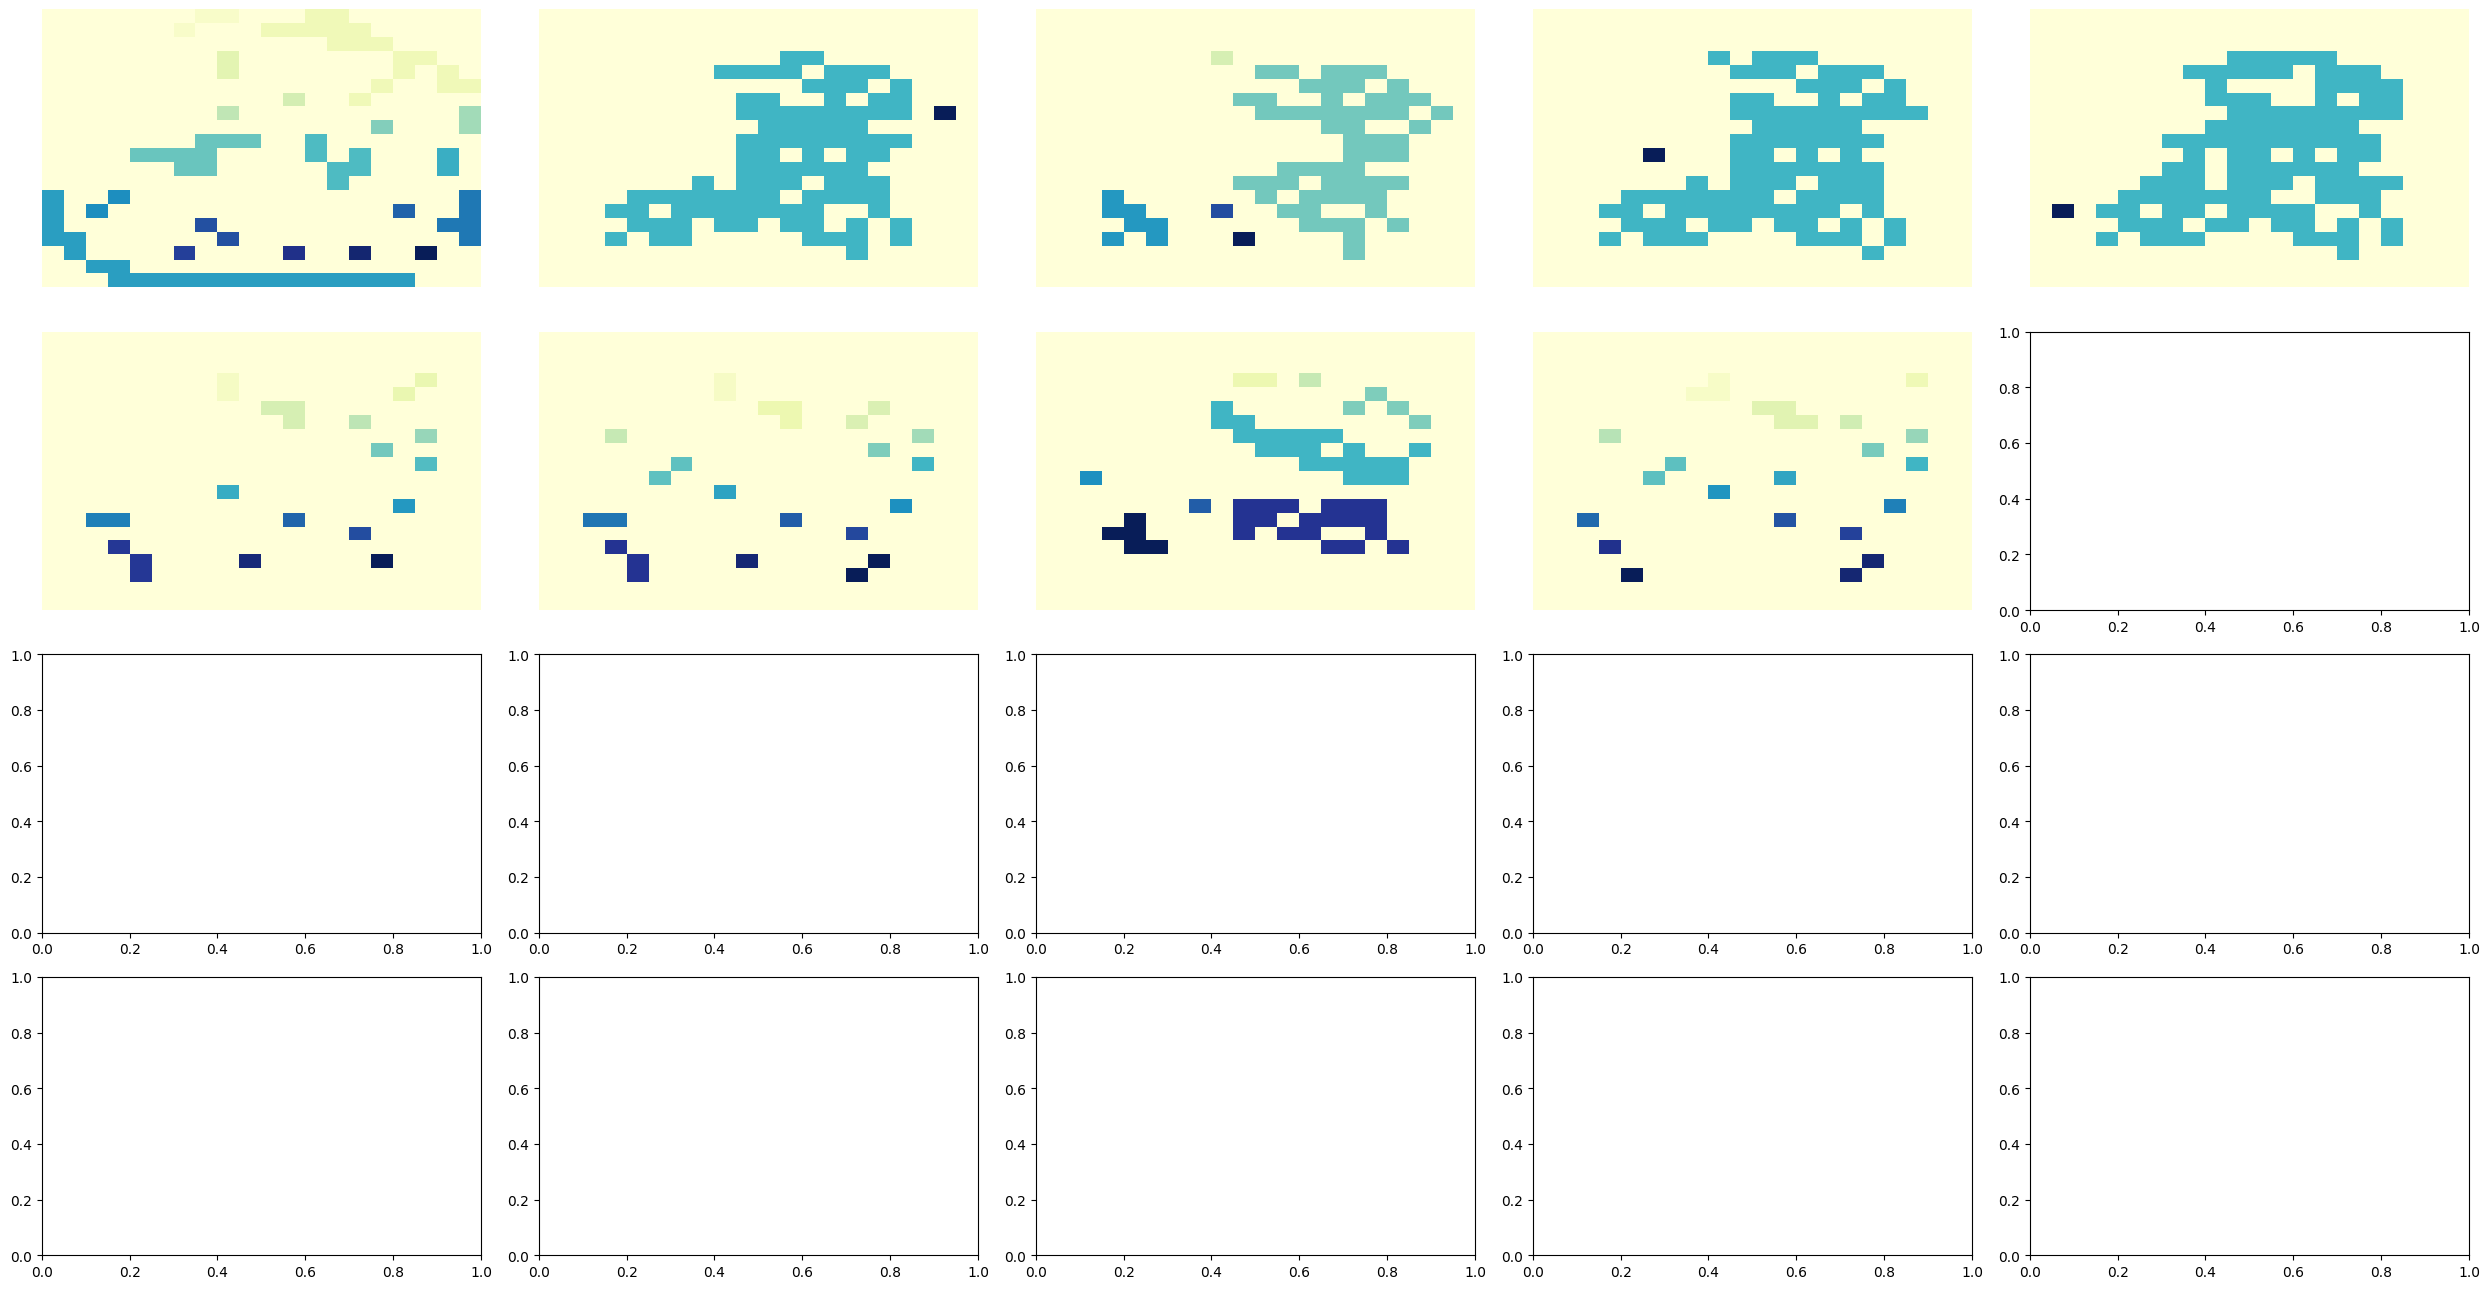

In [25]:
fig, axes = plt.subplots(4,5, figsize=(25,13))
axes = axes.flatten()

for i in range(seven_idx.shape[0]):

    sns.heatmap(maps[seven_idx[i]]["map"], annot=False, cmap="YlGnBu", cbar=False, ax=axes[i], linewidths=0)
    # axes[i].set_title(tags[i], fontsize=24)

    axes[i].axis("off")

    
    # print(tags[i])
plt.tight_layout()
plt.show()

<Axes: >

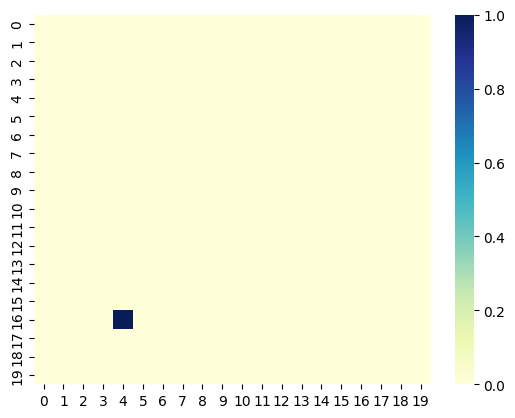

In [21]:
sns.heatmap(maps[14], annot=False, cmap="YlGnBu")